# 샤프지수(Sharpe Ratio)
* 샤프 비율은 투자 자산 또는 매매 전략에서, 일반적으로 위험이라 불리는 편차 한 단위당 초과수익(또는 위험 프리미엄)을 측정한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FinanceDataReader as fdr
kodex_df = fdr.DataReader('069500', '2018-02-07','2021-11-29')
kodex_df

Open   High    Low  Close    Volume    Change
Date                                                      
2018-02-07  29961  29971  28932  28945  11177145 -0.025290
2018-02-08  28945  29280  28867  29189  12851940  0.008430
2018-02-09  28850  28905  28267  28416  17286033 -0.026483
2018-02-12  28541  28850  28431  28732  16223641  0.011120
2018-02-13  28922  29280  28809  28954  10483159  0.007727
...           ...    ...    ...    ...       ...       ...
2021-11-23  39885  39935  39545  39600   5007395 -0.008761
2021-11-24  39715  39910  39315  39520   5758295 -0.002020
2021-11-25  39545  39545  39160  39230   3914923 -0.007338
2021-11-26  39050  39235  38445  38510   5059924 -0.018353
2021-11-29  38115  38510  38005  38205   5194357 -0.007920

[937 rows x 6 columns]

In [3]:
log_rtn_df = np.log(kodex_df.pct_change() + 1).fillna(0)
log_rtn_df.head()

Open      High       Low     Close    Volume    Change
Date                                                                  
2018-02-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-02-08 -0.034499 -0.023326 -0.002249  0.008394  0.139624  0.000000
2018-02-09 -0.003287 -0.012890 -0.021004 -0.026840  0.296404  0.000000
2018-02-12 -0.010768 -0.001905  0.005785  0.011059 -0.063429  0.000000
2018-02-13  0.013261  0.014795  0.013208  0.007697 -0.436699 -0.364124

In [4]:
log_rtn_df = log_rtn_df[['Close']]
log_rtn_df.head()

Close
Date                
2018-02-07  0.000000
2018-02-08  0.008394
2018-02-09 -0.026840
2018-02-12  0.011059
2018-02-13  0.007697

In [5]:
log_rtn_df.columns = ["KODEX200"]
log_rtn_df.head()

KODEX200
Date                
2018-02-07  0.000000
2018-02-08  0.008394
2018-02-09 -0.026840
2018-02-12  0.011059
2018-02-13  0.007697

In [6]:
# log 연간 변동성

log_rtn_df.std() * np.sqrt(252)   

KODEX200    0.199232
dtype: float64

In [7]:
def get_annualized_returns_series(log_returns_df, num_day_in_year=250):  # 연log기대수익률
    return (log_returns_df.mean() * num_day_in_year).round(2)

def get_annualized_std_series(log_returns_df, num_day_in_year=250):   # 연log기대변동성
    return (log_returns_df.std() * (num_day_in_year ** 0.5)).round(2)

In [8]:
# 연간 복리수익률

cum_rtn_df = np.exp(log_rtn_df.cumsum())    # cumsum() : cumulative sum
cum_rtn_df.head()

KODEX200
Date                
2018-02-07  1.000000
2018-02-08  1.008430
2018-02-09  0.981724
2018-02-12  0.992641
2018-02-13  1.000311

In [9]:
cum_rtn_df.iloc[0]
cum_rtn_df.iloc[-1]

KODEX200    1.319917
Name: 2021-11-29 00:00:00, dtype: float64

In [10]:
num_day_in_year = 252
 
cagr = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1

## 연간 누적 수익률 : 7%

In [11]:
# n days 누적수익률을 연간 수익률로 환산

def get_CAGR_series(cum_rtn_df, num_day_in_year=250):  
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

In [12]:
get_CAGR_series(cum_rtn_df)

KODEX200    0.076869
Name: 2021-11-29 00:00:00, dtype: float64

In [13]:
yearly_rfr = 0.025
excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
excess_rtns / (log_rtn_df.std() * np.sqrt(252)) 

KODEX200    0.249208
dtype: float64

## 샤프지수 : 0.24

In [14]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
    return excess_rtns / ((log_rtn_df.std() * np.sqrt(252)))

In [15]:
get_sharpe_ratio(log_rtn_df)

KODEX200    0.249208
dtype: float64

# MDD(Maximum Drawdown)
* 특정 기간동안 발생한 최대 낙폭을 의미하는 하방 리스크 지표 입니다. MDD가 클수록 투자 리스크가 크기 때문에 유의해야 합니다.
* MDD = (기간 동안의 최저점 - 기간 동안의 최고점) / 기간 동안의 최고점

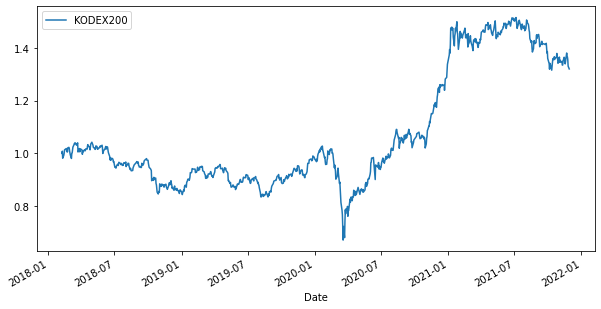

In [16]:
cum_rtn_df.plot(figsize=(10, 5));

<AxesSubplot:xlabel='Date'>

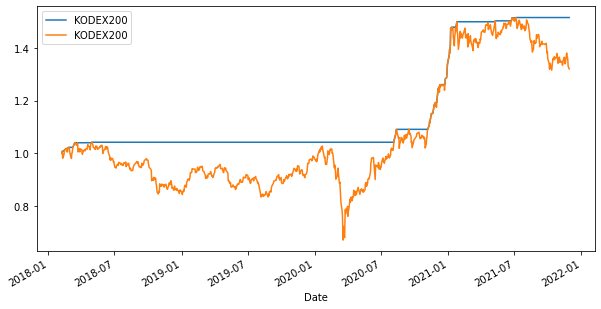

In [17]:
cummax_df = cum_rtn_df.cummax();  # 누적 고점

ax = cummax_df.plot(figsize=(10, 5))
cum_rtn_df.plot(ax=ax)

In [18]:
((cum_rtn_df - cummax_df)/cummax_df)[:10]

KODEX200
Date                
2018-02-07  0.000000
2018-02-08  0.000000
2018-02-09 -0.026483
2018-02-12 -0.015657
2018-02-13 -0.008051
2018-02-14  0.000000
2018-02-19  0.000000
2018-02-20 -0.011465
2018-02-21 -0.006411
2018-02-22 -0.012923

In [19]:
drawdown_df = cum_rtn_df / cummax_df - 1
drawdown_df[:10]

KODEX200
Date                
2018-02-07  0.000000
2018-02-08  0.000000
2018-02-09 -0.026483
2018-02-12 -0.015657
2018-02-13 -0.008051
2018-02-14  0.000000
2018-02-19  0.000000
2018-02-20 -0.011465
2018-02-21 -0.006411
2018-02-22 -0.012923

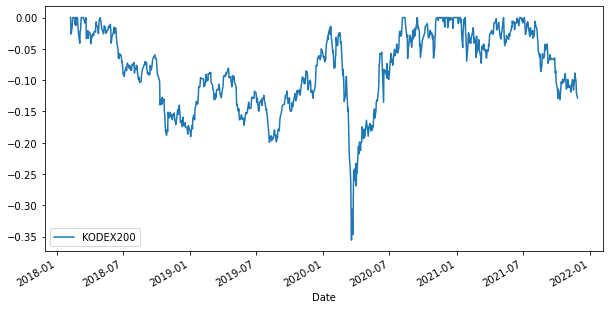

In [20]:
drawdown_df.plot(figsize=(10, 5));

In [21]:
# 최대 손실비율 

mdd_series = drawdown_df.min()
mdd_series

KODEX200   -0.35554
dtype: float64

In [22]:
# 최대 손실기간
drawdown_df

KODEX200
Date                
2018-02-07  0.000000
2018-02-08  0.000000
2018-02-09 -0.026483
2018-02-12 -0.015657
2018-02-13 -0.008051
...              ...
2021-11-23 -0.096715
2021-11-24 -0.098540
2021-11-25 -0.105155
2021-11-26 -0.121578
2021-11-29 -0.128536

[937 rows x 1 columns]

In [23]:
# boolean indexing 인데, 데이터 구조가 series가 아닌, dataframe

drawdown_df == 0

KODEX200
Date                
2018-02-07      True
2018-02-08      True
2018-02-09     False
2018-02-12     False
2018-02-13     False
...              ...
2021-11-23     False
2021-11-24     False
2021-11-25     False
2021-11-26     False
2021-11-29     False

[937 rows x 1 columns]

In [24]:
# dataframe형식으로 boolean index를 넣으면 True 해당 데이터 => 0, False 해당 데이터=> nan
# draw down이 0이면 0, draw down이 0이 아니면 nan

max_point_df = drawdown_df[drawdown_df == 0]
max_point_df.head()

KODEX200
Date                
2018-02-07       0.0
2018-02-08       0.0
2018-02-09       NaN
2018-02-12       NaN
2018-02-13       NaN

In [25]:
_df = max_point_df["KODEX200"]
_df.tail()

Date
2021-11-23   NaN
2021-11-24   NaN
2021-11-25   NaN
2021-11-26   NaN
2021-11-29   NaN
Name: KODEX200, dtype: float64

In [26]:
_df.last_valid_index()  # last_valid_index() : nan이 아닌 마지막 데이터의 인덱스

Timestamp('2021-07-06 00:00:00')

In [27]:
drawdown_df["KODEX200"].last_valid_index()

Timestamp('2021-11-29 00:00:00')

In [28]:
_df.loc[drawdown_df["KODEX200"].last_valid_index()] = 0   # 마지막 데이터 (가장 최근데이)의 값을 0으로

In [29]:
_df.tail()

Date
2021-11-23    NaN
2021-11-24    NaN
2021-11-25    NaN
2021-11-26    NaN
2021-11-29    0.0
Name: KODEX200, dtype: float64

In [30]:
# draw down이 0아닌 데이터를 삭제.. draw down == 0 : 전고점 대비 하락하지 않은 날짜
# draw down이 0보다 작은 데이터를 모두 삭제하고 draw down이 0인 데이터만 남긴다..

_df = _df.dropna()  
_df.tail()

Date
2021-05-10    0.0
2021-06-24    0.0
2021-06-25    0.0
2021-07-06    0.0
2021-11-29    0.0
Name: KODEX200, dtype: float64

In [31]:
# draw down의 기간 길이를 계산
# 얼마 동안 하락하다가 다시 전고점 대비 상승전환하였는지..
# _df.index[1:] : 다음날의 날짜 인덱스
# _df.index[:-1] : 당일의 날짜 인덱스, 길이를 맞추기 위해서 마지막 데이터를 버림

periods = _df.index[1:] - _df.index[:-1]
periods

TimedeltaIndex([  '1 days',   '6 days',   '5 days',   '4 days',   '3 days',
                 '11 days',   '3 days',   '1 days',   '2 days',  '46 days',
                '829 days',   '1 days',   '3 days',   '1 days',   '1 days',
                 '34 days',  '55 days',   '2 days',   '2 days',   '3 days',
                  '3 days',   '1 days',   '3 days',   '1 days',   '2 days',
                  '1 days',   '4 days',   '1 days',   '1 days',   '1 days',
                  '3 days',   '2 days',   '2 days',   '5 days',   '8 days',
                  '4 days',   '1 days',   '1 days',   '5 days',   '1 days',
                  '2 days',   '1 days',   '3 days',  '14 days', '105 days',
                 '45 days',   '1 days',  '11 days', '146 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)

In [32]:
_df.index[1:]

DatetimeIndex(['2018-02-08', '2018-02-14', '2018-02-19', '2018-02-23',
               '2018-02-26', '2018-03-09', '2018-03-12', '2018-03-13',
               '2018-03-15', '2018-04-30', '2020-08-06', '2020-08-07',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-09-15',
               '2020-11-09', '2020-11-11', '2020-11-13', '2020-11-16',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-26', '2020-11-27', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04', '2020-12-07', '2020-12-09',
               '2020-12-11', '2020-12-16', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30', '2021-01-04', '2021-01-05',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-25',
               '2021-05-10', '2021-06-24', '2021-06-25', '2021-07-06',
               '2021-11-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [33]:
_df.index[:-1]

DatetimeIndex(['2018-02-07', '2018-02-08', '2018-02-14', '2018-02-19',
               '2018-02-23', '2018-02-26', '2018-03-09', '2018-03-12',
               '2018-03-13', '2018-03-15', '2018-04-30', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-09-15', '2020-11-09', '2020-11-11', '2020-11-13',
               '2020-11-16', '2020-11-19', '2020-11-20', '2020-11-23',
               '2020-11-24', '2020-11-26', '2020-11-27', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-07',
               '2020-12-09', '2020-12-11', '2020-12-16', '2020-12-24',
               '2020-12-28', '2020-12-29', '2020-12-30', '2021-01-04',
               '2021-01-05', '2021-01-07', '2021-01-08', '2021-01-11',
               '2021-01-25', '2021-05-10', '2021-06-24', '2021-06-25',
               '2021-07-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [34]:
# # draw down이 가장 긴 기간의 순서 인덱스

max_idx = periods.argmax()
max_idx

10

In [35]:
# draw down이 가장 긴 기간

longest_days = periods.max().days
longest_days

829

In [36]:
longest_start_date = _df.index[:-1][max_idx].date()
longest_end_date = _df.index[1:][max_idx].date()

print(longest_start_date, longest_end_date)

2018-04-30 2020-08-06


In [37]:
print(longest_days)
print("{} ~ {}".format(longest_start_date, longest_end_date))

829
2018-04-30 ~ 2020-08-06


In [38]:
print(periods.mean().days)
print(periods.std().days)

28
119


In [39]:
def get_drawdown_infos(cum_returns_df): 

    cummax_df = cum_returns_df.cummax()   # 누적 전고점
    dd_df = cum_returns_df / cummax_df - 1    # 전고점 대비 하락률 - draw down
 

    mdd_series = dd_df.min()  # max draw down - 전고점 대비 가장 큰 낙폭비율


    dd_duration_info_list = list()
    max_point_df = dd_df[dd_df == 0]  # draw down이 0인 데이터만 0, 나머지는 nan값
    for col in max_point_df:
        _df = max_point_df[col]
        _df.loc[dd_df[col].last_valid_index()] = 0   # 마지막 인덱스 데이터값은 0
        
        #  draw down이 0이 아닌 데이터는 모두 삭제, draw down이 0인 데이터만 남김
        # 전고점보다 가격이 상승하는 데이터만 남김..
        _df = _df.dropna()   
        
        periods = _df.index[1:] - _df.index[:-1]  # 구간별 하락 기간의 날짜수를 계산

        days = periods.days
        max_idx = days.argmax()  # 하락이 가장 긴 기간 데이터의 인덱스

        longest_dd_period = days.max()  # 하락이 가장 긴 기간
        dd_mean = int(np.mean(days))  # 평균 하락 기간
        dd_std = int(np.std(days))    # 하락 기간의 변동성(표준편차)
        

        dd_duration_info_list.append(  # 칼럼별(종목별)로 값을 계산해서 리스트에 담는다
            [
                dd_mean,  # 평균 하락기간
                dd_std,   # 하락기간 표준편차
                longest_dd_period,  # 가장 긴 하락 기간
                
                # 가장 긴 하락기간의 시작일과 종료일
                "{} ~ {}".format(_df.index[:-1][max_idx].date(), _df.index[1:][max_idx].date())
            ]
        )

    dd_duration_info_df = pd.DataFrame(
        dd_duration_info_list,
        index=dd_df.columns,
        columns=['drawdown mean', 'drawdown std', 'longest days', 'longest period']
    )
    return dd_df, mdd_series, dd_duration_info_df

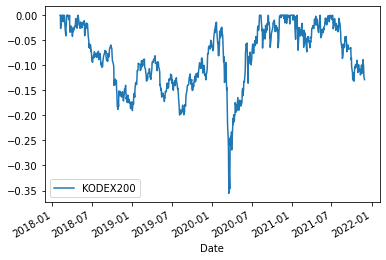

In [40]:
result = get_drawdown_infos(cum_rtn_df)
result[0].plot();

## MDD값 : -0.35

In [41]:
result[1]

KODEX200   -0.35554
dtype: float64

In [42]:
result[2]

drawdown mean  drawdown std  longest days           longest period
KODEX200             28           118           829  2018-04-30 ~ 2020-08-06